#Problem and Dataset

Problem & Dataset: https://www.hackerearth.com/challenges/competitive/hackerearth-deep-learning-challenge-identify-dance-form/<br>
References: 
1. https://github.com/gauravk268/Machine_Learning_Projects/blob/master/Emotion-Detection-Tom-Jerry-Cartoon/hackerearth_deep_learning_challenge_emotion_detection_tom_jerry_cartoon.ipynb<br>
2.<a href='https://www.kaggle.com/fujisan/use-keras-pre-trained-vgg16-acc-98'>use Keras pre-trained VGG16 acc 98%</a><br>
3. <a href='https://www.machinecurve.com/index.php/2020/02/18/how-to-use-k-fold-cross-validation-with-keras'>How to use K-fold Cross Validation with Keras?</a>

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [27]:
%cd /content/gdrive/My\ Drive/

PATH = "/content/gdrive/My Drive/Colab Notebooks/Identify_the_Dance_Form/"

import os
os.chdir(PATH)

for dirname, _, filenames in os.walk(PATH):
    print("\nChanging Directory to: ", dirname)
    # for filename in filenames:
    #     print(filename)

/content/gdrive/My Drive

Changing Directory to:  /content/gdrive/My Drive/Colab Notebooks/Identify_the_Dance_Form/

Changing Directory to:  /content/gdrive/My Drive/Colab Notebooks/Identify_the_Dance_Form/dataset

Changing Directory to:  /content/gdrive/My Drive/Colab Notebooks/Identify_the_Dance_Form/dataset/train

Changing Directory to:  /content/gdrive/My Drive/Colab Notebooks/Identify_the_Dance_Form/dataset/test

Changing Directory to:  /content/gdrive/My Drive/Colab Notebooks/Identify_the_Dance_Form/.ipynb_checkpoints


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from skimage.transform import resize
import seaborn as sns

import tensorflow as tf

from tqdm import tqdm, trange

In [29]:
df_train = pd.read_csv("./dataset/train.csv")
df_test = pd.read_csv("./dataset/test.csv")

print(df_train.shape, df_test.shape)
df_train.head()

(364, 2) (156, 1)


,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


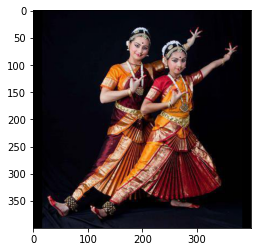

In [30]:
img = plt.imread('./dataset/train/120.jpg')
plt.imshow(img)

In [31]:
X = []
for image in tqdm(df_train['Image']):
    img = plt.imread("./dataset/train/" + image)
    X.append(img)

X = np.array(X)

X_test = []
for image in tqdm(df_test['Image']):
    img = plt.imread("./dataset/test/" + image)
    X_test.append(img)

X_test = np.array(X_test)

100%|██████████| 156/156 [00:01<00:00, 118.33it/s]


Text(0.5, 0, 'Dance Forms')

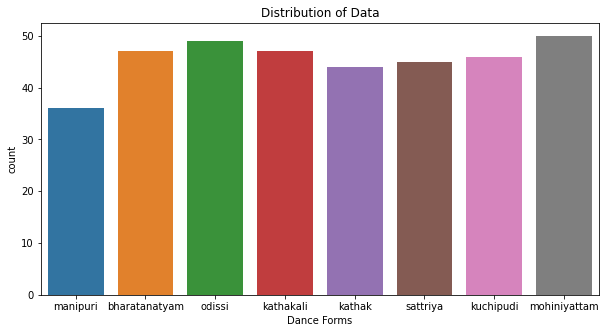

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.countplot(df_train['target'], ax=axs)
axs.set_title('Distribution of Data')
axs.set_xlabel('Dance Forms')

In [33]:
'''
0 manipuri
1 bharatnatyam
2 odissi
3 kathakali
4 kathak
5 sattriya
6 kuchipudi
7 mohiniyattam
'''

y = []

value = 0

for i in tqdm(df_train['target']):
    if i == 'manipuri':
        value = [0]
    if i == 'bharatnatyam':
        value = [1]
    if i == 'odissi':
        value = [2]
    if i == 'kathakali':
        value = [3]
    if i == 'kathak':
        value = [4]
    if i == 'sattriya':
        value = [5]
    if i == 'kuchipudi':
        value = [6]
    if i == 'mohiniyattam':
        value = [7]

    y.append(value)

# y = np.reshape(y, (len(y), 1))
# y.shape

# y
# y = np.asarray(y)
y = np_utils.to_categorical(y)
y.shape

100%|██████████| 364/364 [00:00<00:00, 401453.24it/s]


(364, 8)

In [34]:
image = []

for i in trange(0, X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224, 224)).astype(int)
    image.append(a)
X = np.array(image)

img = []
for i in trange(0, X_test.shape[0]):
    a = resize(X_test[i], preserve_range=True, output_shape=(224, 224)).astype(int)
    img.append(a)
X_test = np.array(img)

100%|██████████| 156/156 [00:11<00:00, 13.41it/s]


In [35]:
X.shape, y.shape

((364, 224, 224, 3), (364, 8))

In [36]:
X = X.astype('float32')
X /= 255

X_test = X_test.astype('float32')
X_test /= 255

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [38]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

img_rows, img_cols, img_channel = 224, 224, 3

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

In [49]:
batch_size = 32
num_classes = 8
epochs = 50

In [50]:
model = Sequential()
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model = Model(inputs=base_model.input, outputs=model(base_model.output))

model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

train_datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening = False,
        zca_epsilon = 1e-06,
        rotation_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format = None,
        validation_split=0.0)
train_datagen.fit(X_train)

# checkPointer = ModelCheckpoint(filepath='model1_weights_best.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_accuracy', save_best_only=True)]
)

model.save("model1.h5")

Epoch 1/50
9/9 [==============================] - 8s 932ms/step - loss: 0.5205 - accuracy: 0.8272 - val_loss: 0.4791 - val_accuracy: 0.8493
Epoch 2/50
9/9 [==============================] - 7s 827ms/step - loss: 0.4060 - accuracy: 0.8581 - val_loss: 0.4251 - val_accuracy: 0.8613
Epoch 3/50
9/9 [==============================] - 8s 903ms/step - loss: 0.3504 - accuracy: 0.8698 - val_loss: 0.3613 - val_accuracy: 0.8733
Epoch 4/50
9/9 [==============================] - 7s 784ms/step - loss: 0.3110 - accuracy: 0.8728 - val_loss: 0.3362 - val_accuracy: 0.8818
Epoch 5/50
9/9 [==============================] - 7s 831ms/step - loss: 0.2913 - accuracy: 0.8962 - val_loss: 0.3187 - val_accuracy: 0.8887
Epoch 6/50
9/9 [==============================] - 7s 831ms/step - loss: 0.2864 - accuracy: 0.8909 - val_loss: 0.3171 - val_accuracy: 0.8870
Epoch 7/50
9/9 [==============================] - 8s 906ms/step - loss: 0.2778 - accuracy: 0.8889 - val_loss: 0.3059 - val_accuracy: 0.8904
Epoch 8/50
9/9 [====

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


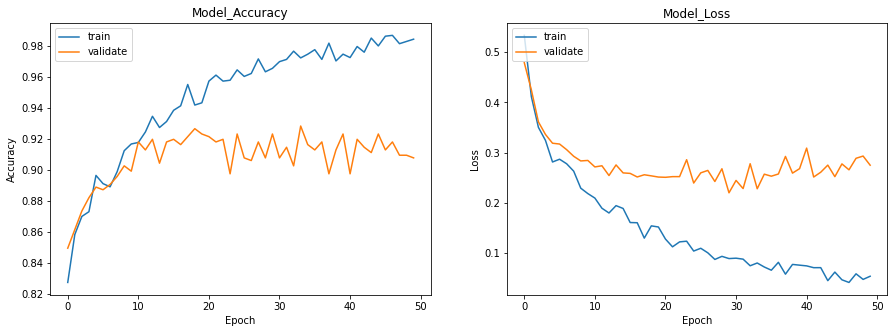

In [52]:
def plotModelHistory(history):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model_Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model_Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')

    plt.show()

print(history.history.keys())

plotModelHistory(history)

In [53]:
scores = model.evaluate(X_valid, y_valid, verbose=1)
print('Test Loss: ', scores[0])
print('Test Accuracy: ', scores[1])

73/73 [==============================] - 1s 11ms/step
Test Loss:  0.2749650662075983
Test Accuracy:  0.9075342416763306


In [ ]:
predictions = model.predict(X_test)
# predictions[1]

y_classes = [np.argmax(y, axis=None, out=None) for y in predictions]

In [ ]:
'''
0 manipuri
1 bharatnatyam
2 odissi
3 kathakali
4 kathak
5 sattriya
6 kuchipudi
7 mohiniyattam
'''

dance = ''

result = []

for i in tqdm(y_classes):
    if i == 0:
        dance = 'manipuri'
    if i == 1:
        dance = 'bharatnatyam'
    if i == 2:
        dance = 'odissi'
    if i == 3:
        dance = 'kathakali'
    if i == 4:
        dance = 'kathak'
    if i == 5:
        dance = 'sattriya'
    if i == 6:
        dance = 'kuchipudi'
    if i == 7:
        dance = 'mohiniyattam'

    result.append(dance)

In [ ]:
temp = df_test
# temp.insert(1, "target", result)
temp.head() 

In [ ]:
temp.to_csv('Submission.csv', index=False, header=True)

#Using K-Fold Cross Validation

In [54]:
# Merge inputs and targets
inputs = np.concatenate((X_train, X_valid), axis=0)
targets = np.concatenate((y_train, y_valid), axis=0)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
9/9 [==============================] - 8s 930ms/step - loss: 0.0426 - accuracy: 0.9850 - val_loss: 0.2607 - val_accuracy: 0.9178
Epoch 2/25


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


9/9 [==============================] - 8s 836ms/step - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.2716 - val_accuracy: 0.9041
Epoch 3/25
9/9 [==============================] - 8s 834ms/step - loss: 0.0426 - accuracy: 0.9841 - val_loss: 0.2480 - val_accuracy: 0.9212
Epoch 4/25
9/9 [==============================] - 8s 908ms/step - loss: 0.0420 - accuracy: 0.9891 - val_loss: 0.3078 - val_accuracy: 0.9041
Epoch 5/25
9/9 [==============================] - 8s 876ms/step - loss: 0.0519 - accuracy: 0.9853 - val_loss: 0.2670 - val_accuracy: 0.9110
Epoch 6/25
9/9 [==============================] - 8s 907ms/step - loss: 0.0455 - accuracy: 0.9822 - val_loss: 0.2757 - val_accuracy: 0.9092
Epoch 7/25
9/9 [==============================] - 8s 836ms/step - loss: 0.0417 - accuracy: 0.9860 - val_loss: 0.2960 - val_accuracy: 0.9024
Epoch 8/25
9/9 [==============================] - 8s 862ms/step - loss: 0.0358 - accuracy: 0.9903 - val_loss: 0.2440 - val_accuracy: 0.9264
Epoch 9/25
9/9 [===============

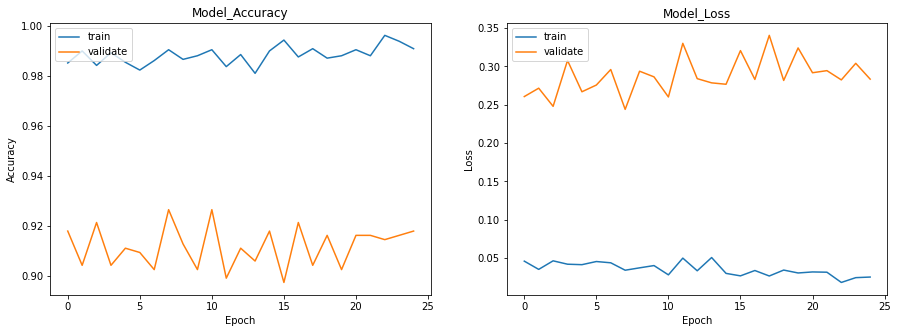

Score for fold 1: loss of 0.09894278686340541; accuracy of 97.08904027938843%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/25
9/9 [==============================] - 8s 892ms/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.2950 - val_accuracy: 0.9092
Epoch 2/25
9/9 [==============================] - 8s 911ms/step - loss: 0.0255 - accuracy: 0.9905 - val_loss: 0.2936 - val_accuracy: 0.9212
Epoch 3/25
9/9 [==============================] - 7s 788ms/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.3055 - val_accuracy: 0.9075
Epoch 4/25
9/9 [==============================] - 8s 836ms/step - loss: 0.0196 - accuracy: 0.9957 - val_loss: 0.3045 - val_accuracy: 0.9178
Epoch 5/25
9/9 [==============================] - 8s 920ms/step - loss: 0.0249 - accuracy: 0.9913 - val_loss: 0.3405 - val_accuracy: 0.8921
Epoch 6/25
9/9 [==============================] - 8s 910ms/step - loss: 0.0192 - accuracy: 0.9961 - val_loss: 0.3266 - val_ac

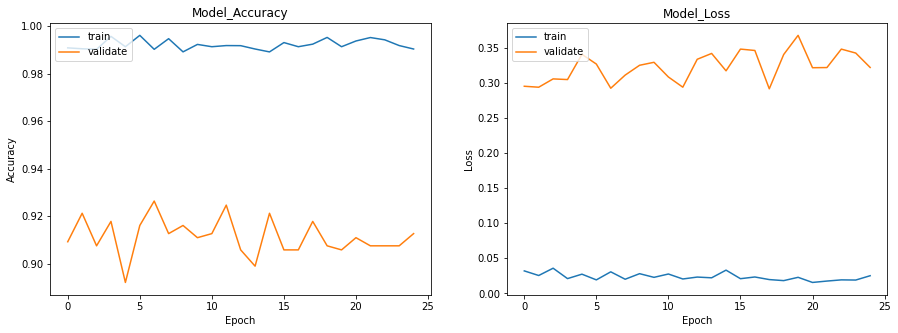

Score for fold 2: loss of 0.08413889840857623; accuracy of 97.08904027938843%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/25
9/9 [==============================] - 8s 927ms/step - loss: 0.0203 - accuracy: 0.9932 - val_loss: 0.3292 - val_accuracy: 0.9178
Epoch 2/25
9/9 [==============================] - 8s 838ms/step - loss: 0.0104 - accuracy: 0.9957 - val_loss: 0.3696 - val_accuracy: 0.9144
Epoch 3/25
9/9 [==============================] - 8s 920ms/step - loss: 0.0119 - accuracy: 0.9942 - val_loss: 0.3011 - val_accuracy: 0.9281
Epoch 4/25
9/9 [==============================] - 8s 836ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.3188 - val_accuracy: 0.9110
Epoch 5/25
9/9 [==============================] - 8s 836ms/step - loss: 0.0153 - accuracy: 0.9937 - val_loss: 0.3203 - val_accuracy: 0.9144
Epoch 6/25
9/9 [==============================] - 8s 837ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.2886 - val_ac

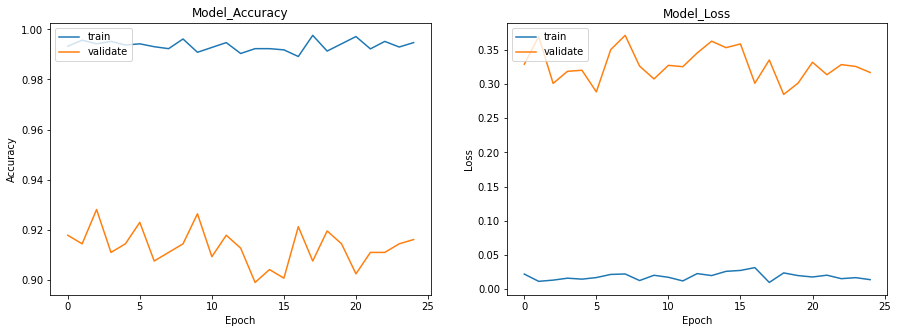

Score for fold 3: loss of 0.04447714719053817; accuracy of 98.45890402793884%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/25
9/9 [==============================] - 8s 930ms/step - loss: 0.0148 - accuracy: 0.9947 - val_loss: 0.3455 - val_accuracy: 0.9144
Epoch 2/25
9/9 [==============================] - 8s 835ms/step - loss: 0.0137 - accuracy: 0.9947 - val_loss: 0.3007 - val_accuracy: 0.9264
Epoch 3/25
9/9 [==============================] - 8s 837ms/step - loss: 0.0141 - accuracy: 0.9913 - val_loss: 0.3175 - val_accuracy: 0.9178
Epoch 4/25
9/9 [==============================] - 8s 837ms/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.3090 - val_accuracy: 0.9127
Epoch 5/25
9/9 [==============================] - 8s 835ms/step - loss: 0.0149 - accuracy: 0.9918 - val_loss: 0.3400 - val_accuracy: 0.9144
Epoch 6/25
9/9 [==============================] - 8s 835ms/step - loss: 0.0154 - accuracy: 0.9928 - val_loss: 0.3506 - val_ac

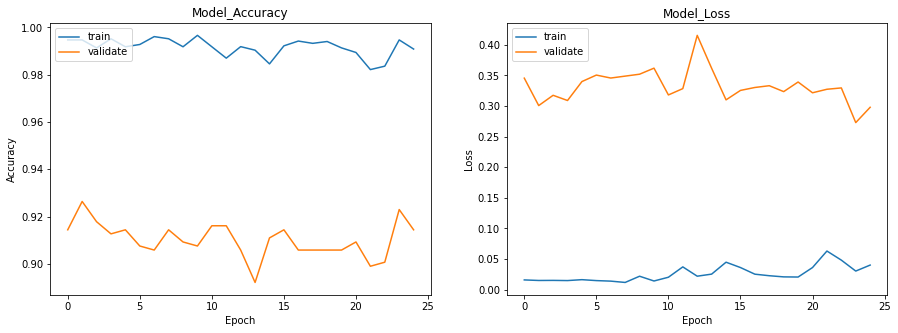

Score for fold 4: loss of 0.06484269197673014; accuracy of 98.45890402793884%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/25
9/9 [==============================] - 8s 897ms/step - loss: 0.0246 - accuracy: 0.9928 - val_loss: 0.2962 - val_accuracy: 0.9178
Epoch 2/25
9/9 [==============================] - 8s 835ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.3037 - val_accuracy: 0.9144
Epoch 3/25
9/9 [==============================] - 8s 910ms/step - loss: 0.0229 - accuracy: 0.9922 - val_loss: 0.2966 - val_accuracy: 0.9144
Epoch 4/25
9/9 [==============================] - 8s 866ms/step - loss: 0.0215 - accuracy: 0.9937 - val_loss: 0.3037 - val_accuracy: 0.9092
Epoch 5/25
9/9 [==============================] - 7s 762ms/step - loss: 0.0095 - accuracy: 0.9957 - val_loss: 0.3311 - val_accuracy: 0.9127
Epoch 6/25
9/9 [==============================] - 8s 910ms/step - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.3409 - val_ac

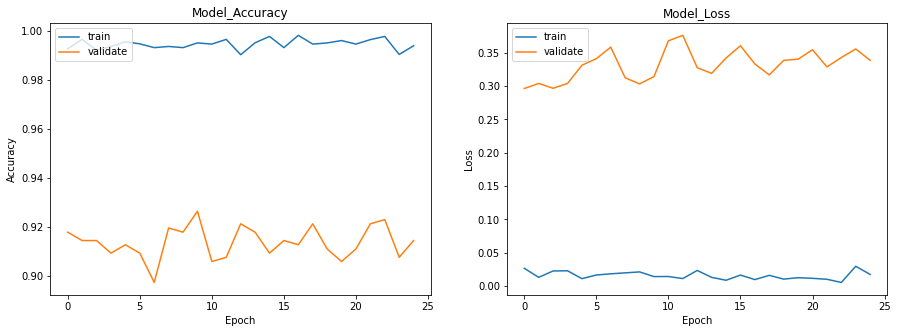

Score for fold 5: loss of 0.072823272836912; accuracy of 98.61111044883728%


In [55]:
from sklearn.model_selection import KFold

# Model configuration
batch_size = 32
num_classes = 8
epochs = 25
verbosity = 1
num_folds = 5

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    #Saving the best model weights
    checkPointer = ModelCheckpoint(filepath='model2_weights_best.hdf5', verbose=1, save_best_only=True)

    # Fit data to model
    history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(X_valid, y_valid),
    callbacks=[ModelCheckpoint('VGG16-transferlearning.model', monitor='val_acc', save_best_only=True)]
    )

    plotModelHistory(history)


    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1


model.save("model2.h5")

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
predictions = model.predict(X_test)
# predictions[1]

y_classes = [np.argmax(y, axis=None, out=None) for y in predictions]

In [ ]:
'''
0 manipuri
1 bharatnatyam
2 odissi
3 kathakali
4 kathak
5 sattriya
6 kuchipudi
7 mohiniyattam
'''

dance = ''

result1 = []

for i in tqdm(y_classes):
    if i == 0:
        dance = 'manipuri'
    if i == 1:
        dance = 'bharatnatyam'
    if i == 2:
        dance = 'odissi'
    if i == 3:
        dance = 'kathakali'
    if i == 4:
        dance = 'kathak'
    if i == 5:
        dance = 'sattriya'
    if i == 6:
        dance = 'kuchipudi'
    if i == 7:
        dance = 'mohiniyattam'

    result1.append(dance)

In [ ]:
temp4 = df_test[['Image']]
temp4.insert(1, "target", result1)
temp4.head() 

In [ ]:
temp4.to_csv('Submission1.csv', index=False, header=True)

In [ ]:
df_test.head()